In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../')
benin = pd.read_csv('../data/benin-malanville.csv')
sierralione = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../data/togo-dapaong_qc.csv')

In [8]:
benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# df = data[data["Comments"].notnull()]
# df.head()
df = benin.drop(['Comments'],axis=1)
df.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [4]:
df.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

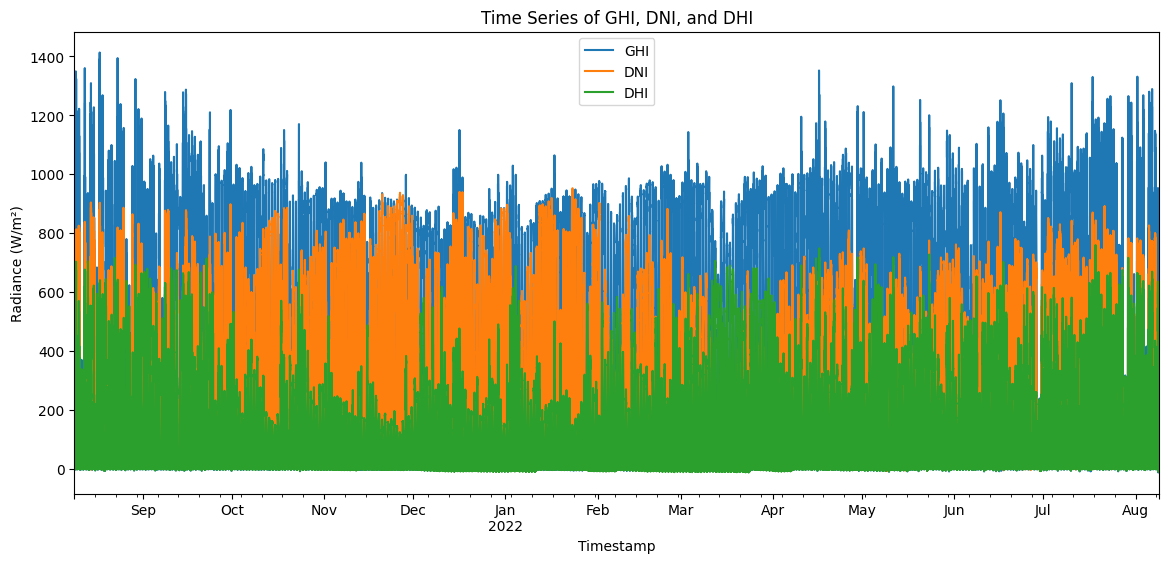

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
df.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI'], ax=ax)
plt.title('Time Series of GHI, DNI, and DHI')
plt.ylabel('Radiance (W/m²)')
plt.xlabel('Timestamp')
plt.legend(['GHI', 'DNI', 'DHI'])
plt.show()

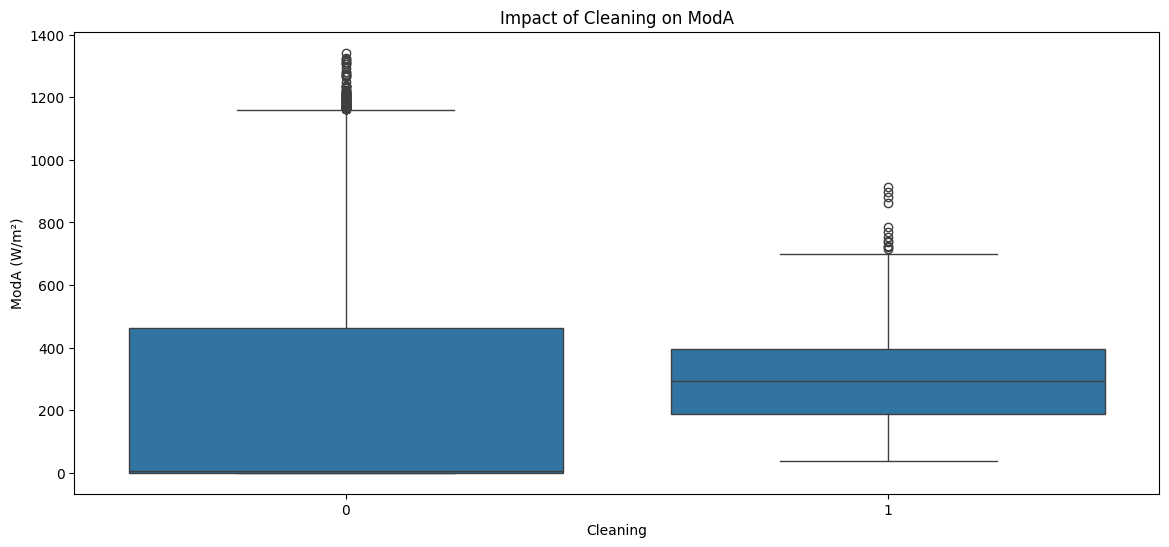

In [9]:
#Evaluate the impact of cleaning
# Plot ModA and ModB with cleaning status
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='Cleaning', y='ModA', data=df, ax=ax)
plt.title('Impact of Cleaning on ModA')
plt.ylabel('ModA (W/m²)')
plt.xlabel('Cleaning')
plt.show()

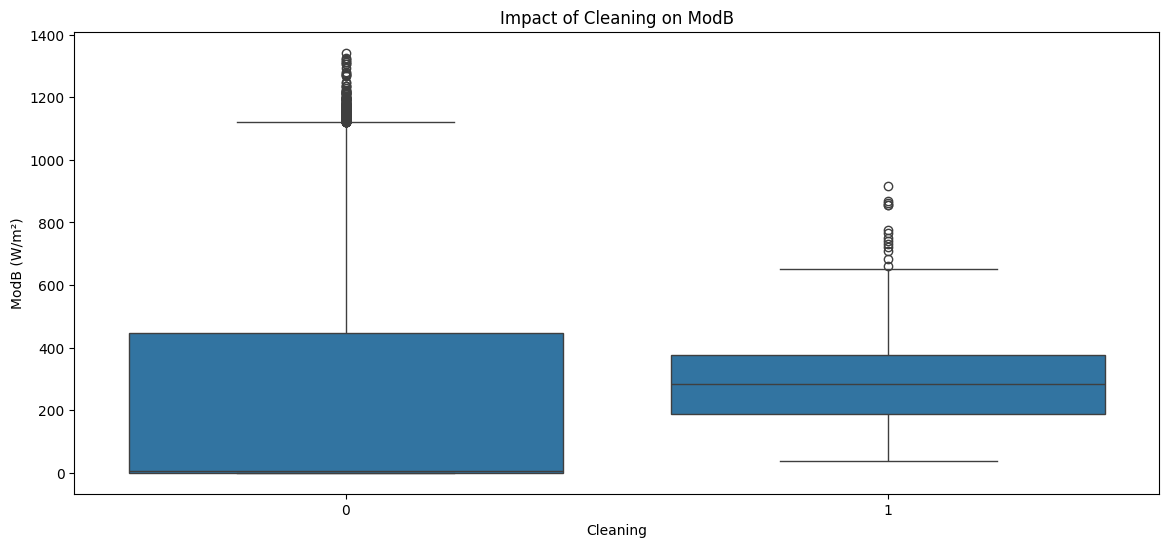

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='Cleaning', y='ModB', data=df, ax=ax)
plt.title('Impact of Cleaning on ModB')
plt.ylabel('ModB (W/m²)')
plt.xlabel('Cleaning')
plt.show()

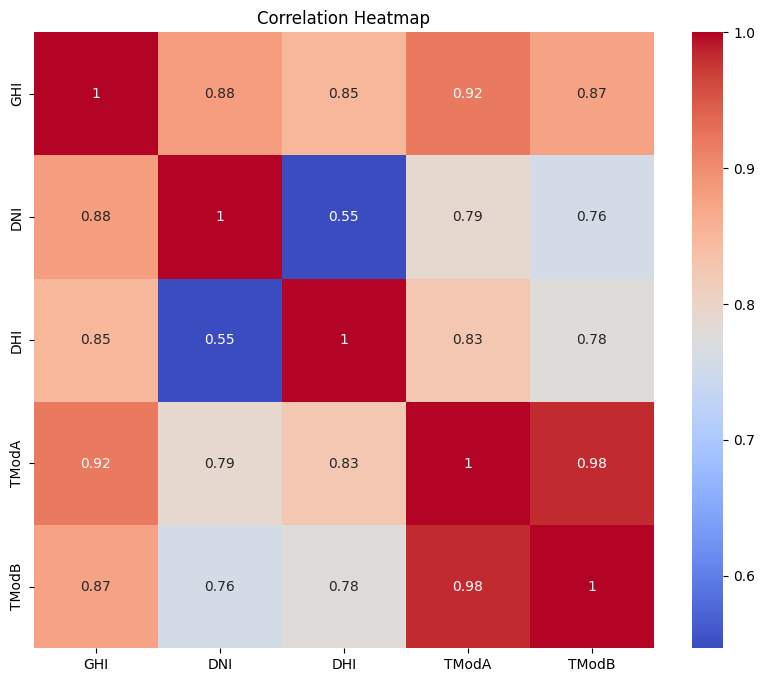

In [11]:
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

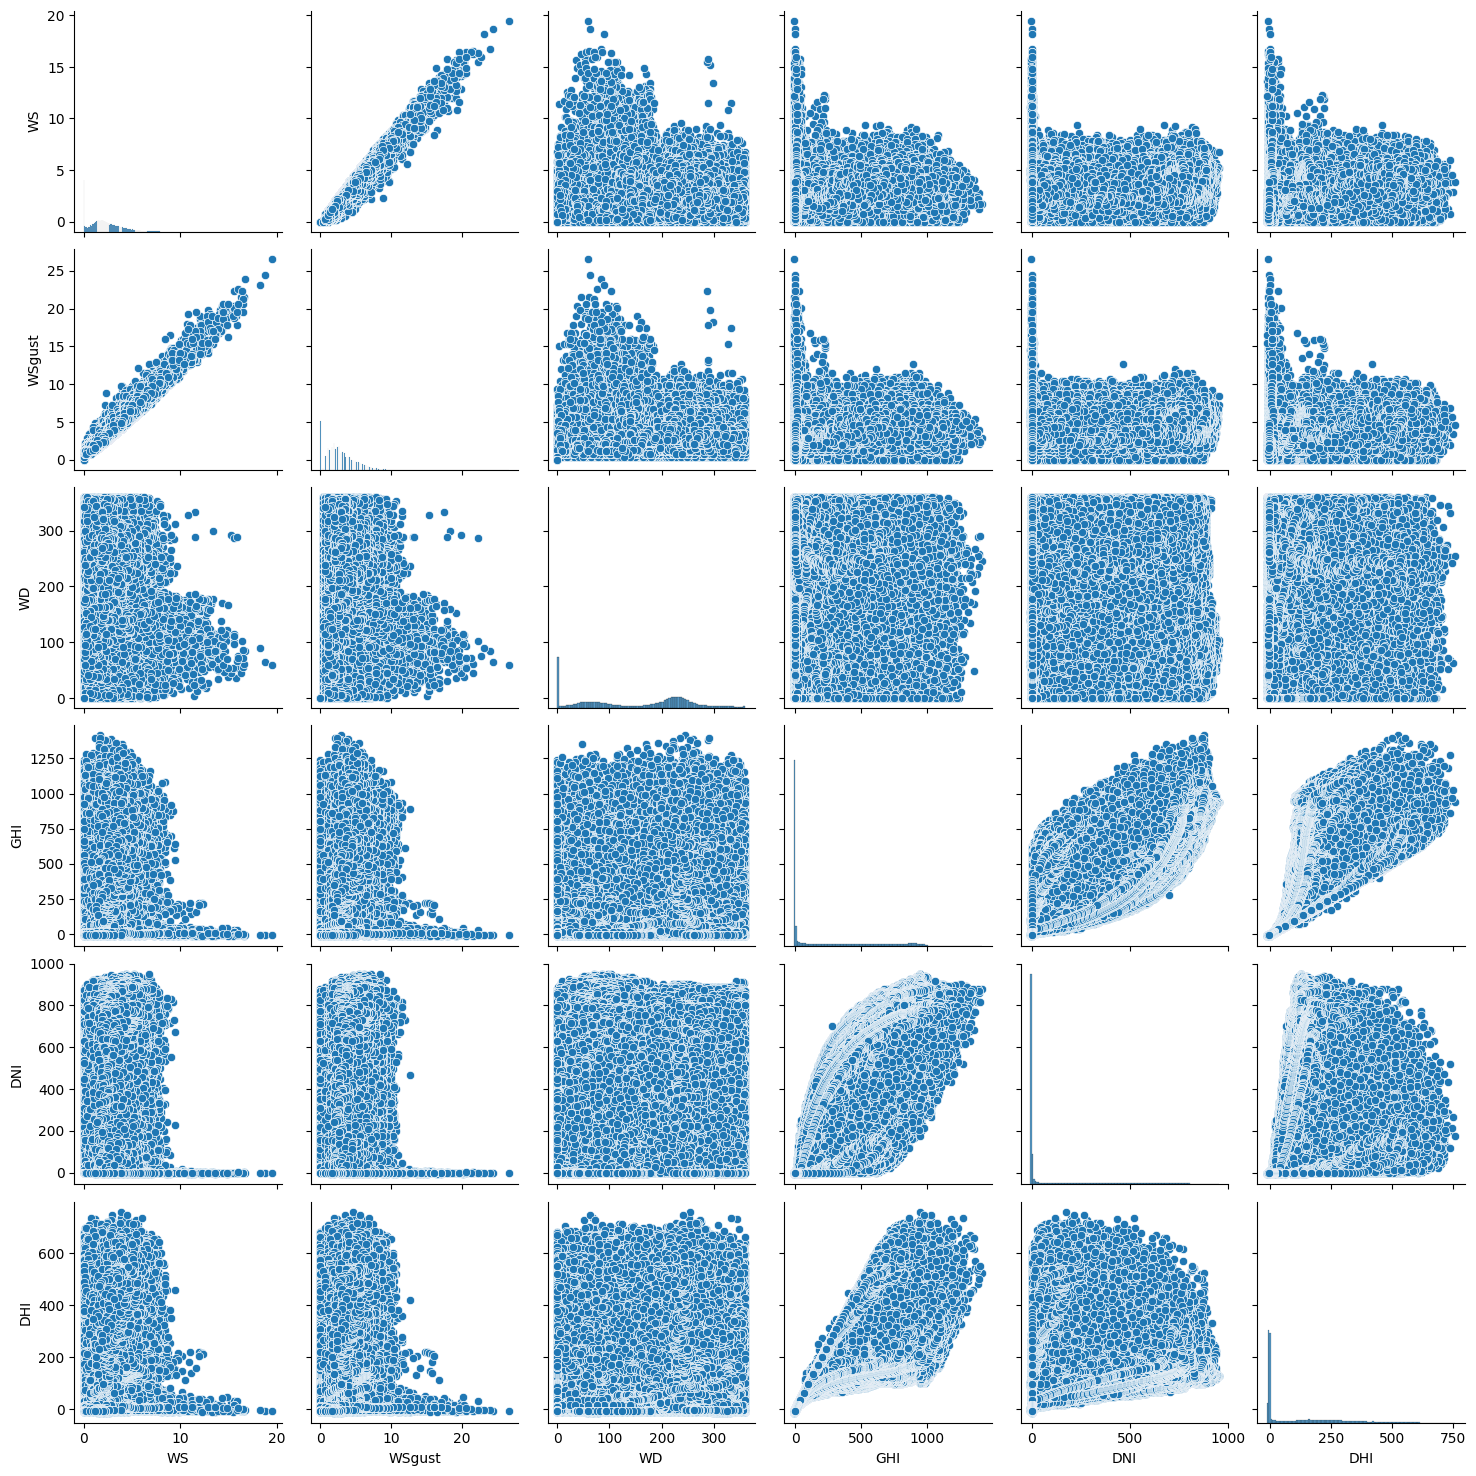

In [12]:
sns.pairplot(benin[['WS','WSgust','WD','GHI','DNI','DHI']])

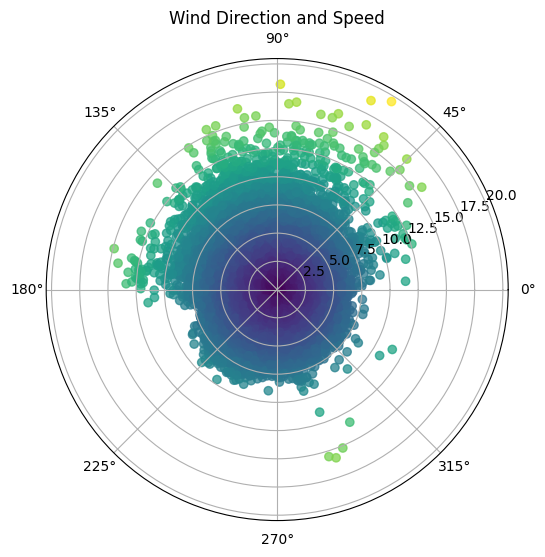

In [13]:
# Polar plot of wind direction and speed
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, polar=True)
ax.scatter(df['WD'] * (np.pi / 180), df['WS'], c=df['WS'], cmap='viridis', alpha=0.75)
ax.set_title('Wind Direction and Speed')
plt.show()

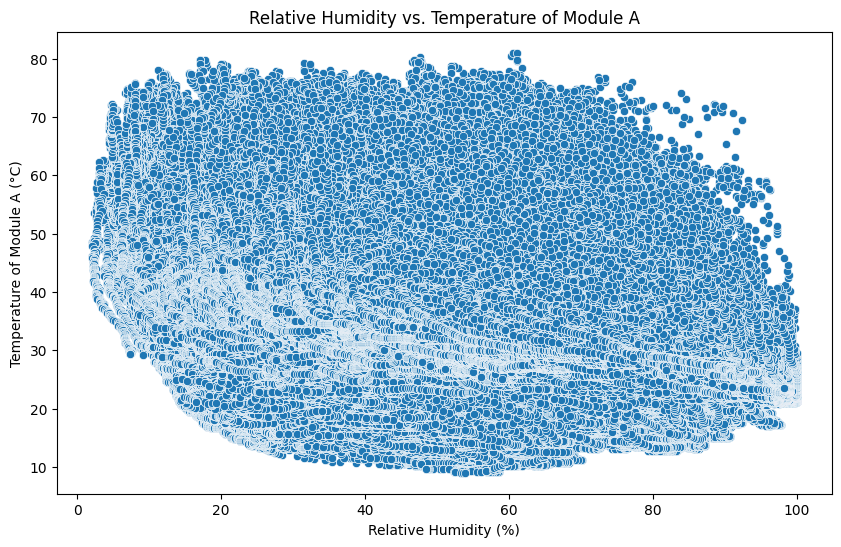

In [14]:
#Temprature analysis
# Scatter plot of RH vs. TModA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='TModA', data=df)
plt.title('Relative Humidity vs. Temperature of Module A')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature of Module A (°C)')
plt.show()

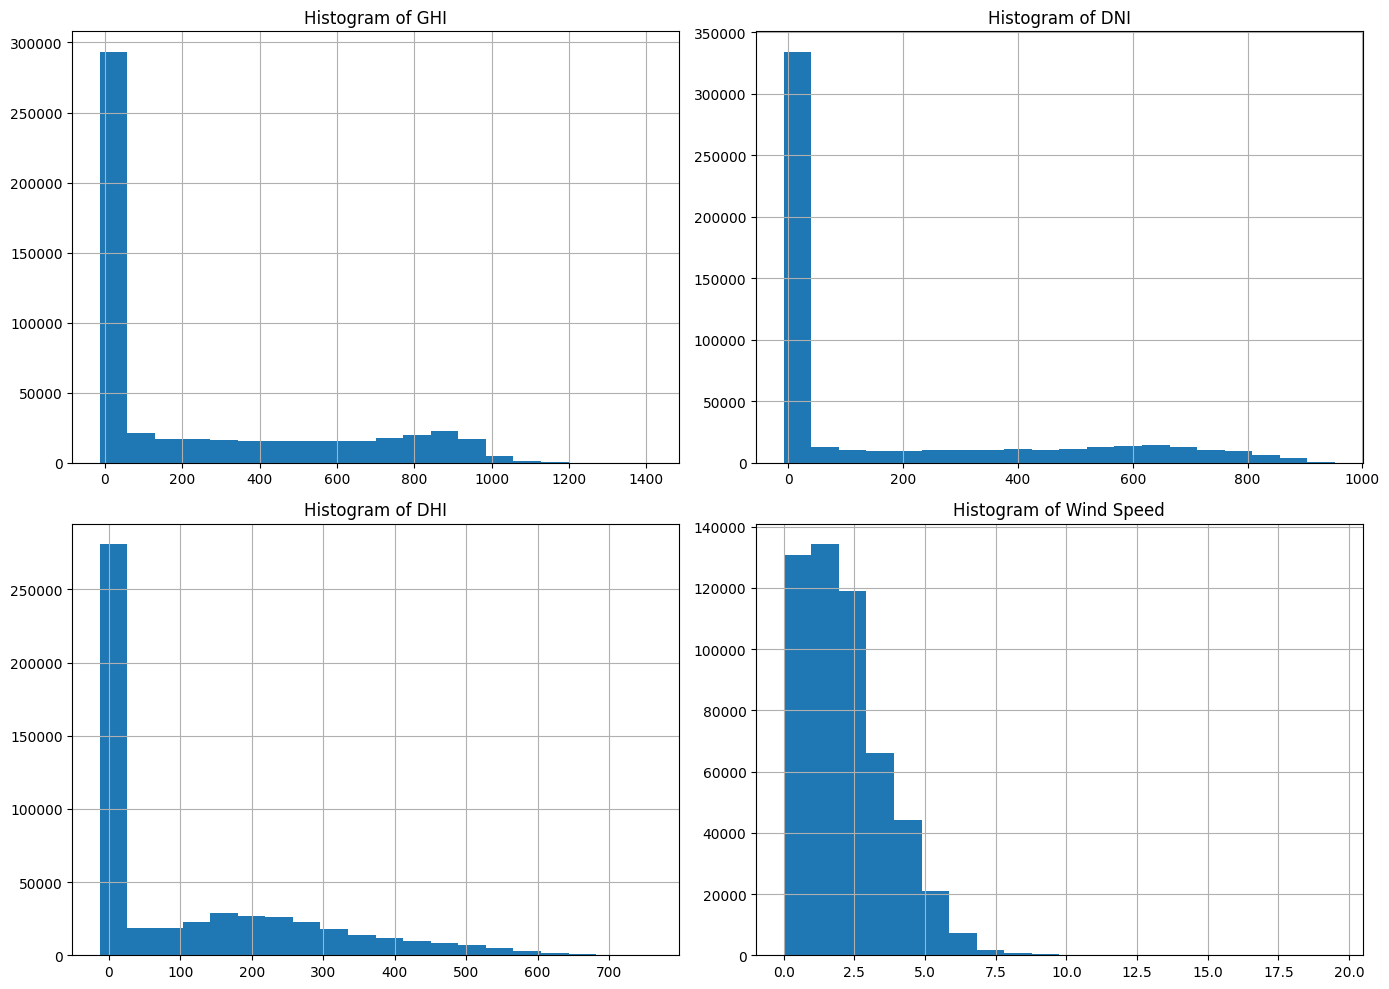

In [15]:
# Plot histograms for GHI, DNI, DHI, WS
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
df['GHI'].hist(ax=axs[0, 0], bins=20)
axs[0, 0].set_title('Histogram of GHI')
df['DNI'].hist(ax=axs[0, 1], bins=20)
axs[0, 1].set_title('Histogram of DNI')
df['DHI'].hist(ax=axs[1, 0], bins=20)
axs[1, 0].set_title('Histogram of DHI')
df['WS'].hist(ax=axs[1, 1], bins=20)
axs[1, 1].set_title('Histogram of Wind Speed')
plt.tight_layout()
plt.show()

In [17]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS']].dropna())
df_z_scores = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS'])

# Identify outliers
outliers = (df_z_scores > 3) | (df_z_scores < -3)
print(df[outliers.any(axis=1)])

                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
525105 2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7   
525107 2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7   
525119 2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0   
525141 2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525151 2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WD

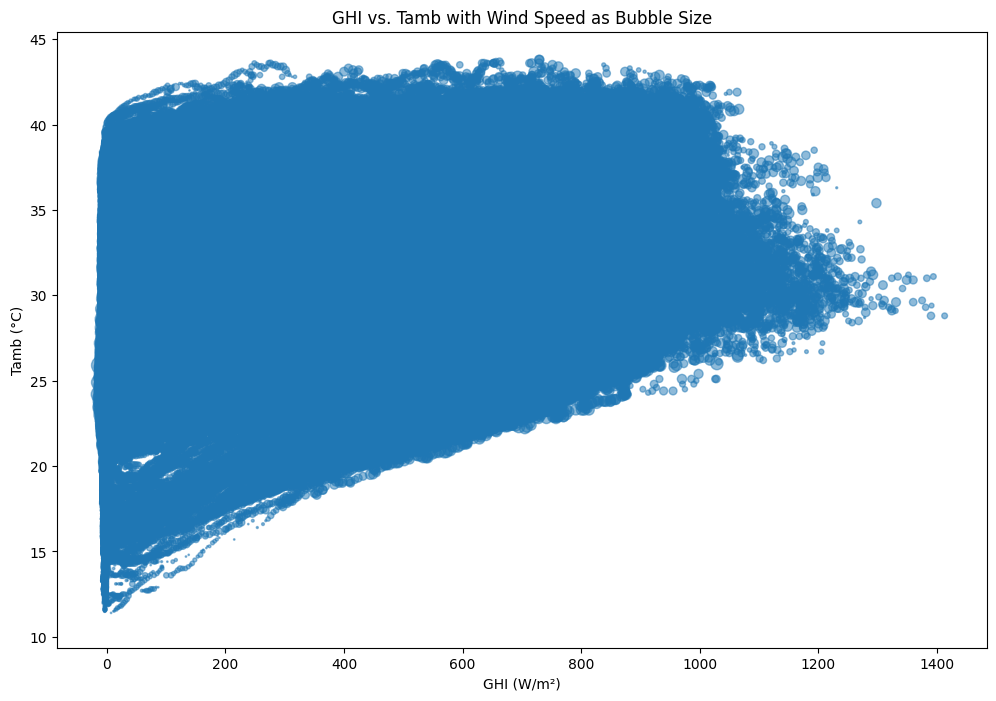

In [18]:
# Bubble chart of GHI vs. Tamb vs. WS
plt.figure(figsize=(12, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['WS']*10, alpha=0.5)
plt.title('GHI vs. Tamb with Wind Speed as Bubble Size')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()

In [20]:
# Handling missing values
df_cleaned = df.dropna()  # or use df.fillna(method='ffill') for forward fill

# Further cleaning based on initial analysis
# e.g., Remove negative values if necessary
df_cleaned = df_cleaned[df_cleaned['GHI'] >= 0]

In [21]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [22]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

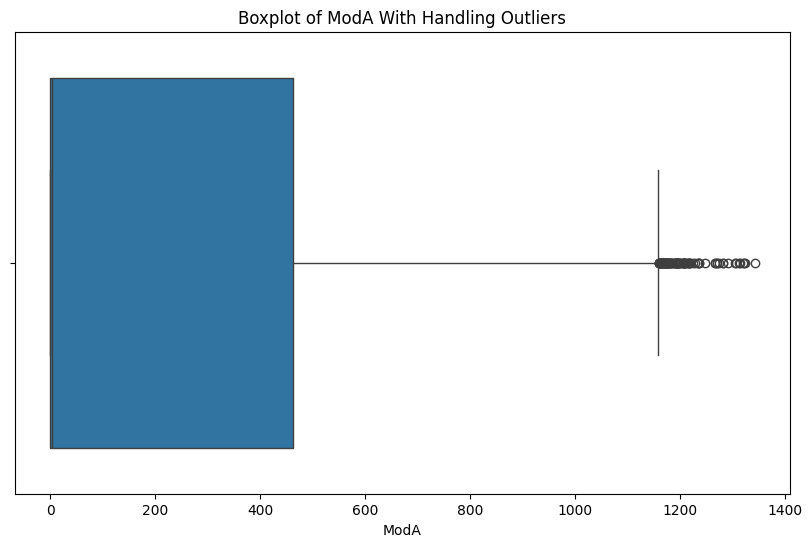

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ModA'])
plt.title('Boxplot of ModA With Handling Outliers')
plt.show()

In [24]:
def removeOutliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Detected outliers in column:\n{outliers}")

    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Data without outliers in {column}:\n{df_no_outliers}")

    return df_no_outliers

In [23]:
removeOutliers('ModA')
removeOutliers('ModB')
removeOutliers('WS')
removeOutliers('WSgust')

Detected outliers in column:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
5019   2021-08-12 11:40:00  1324.0  675.6  659.6  1271.0  1271.0  29.1  75.4   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
514922 2022-08-01 14:03:00  1311.0  698.0  628.4  1182.0  1171.0  29.7  70.2   
517777 2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659 2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         W

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9


Detected outliers in column:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
5019   2021-08-12 11:40:00  1324.0  675.6  659.6  1271.0  1271.0  29.1  75.4   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
514922 2022-08-01 14:03:00  1311.0  698.0  628.4  1182.0  1171.0  29.7  70.2   
517777 2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659 2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         W

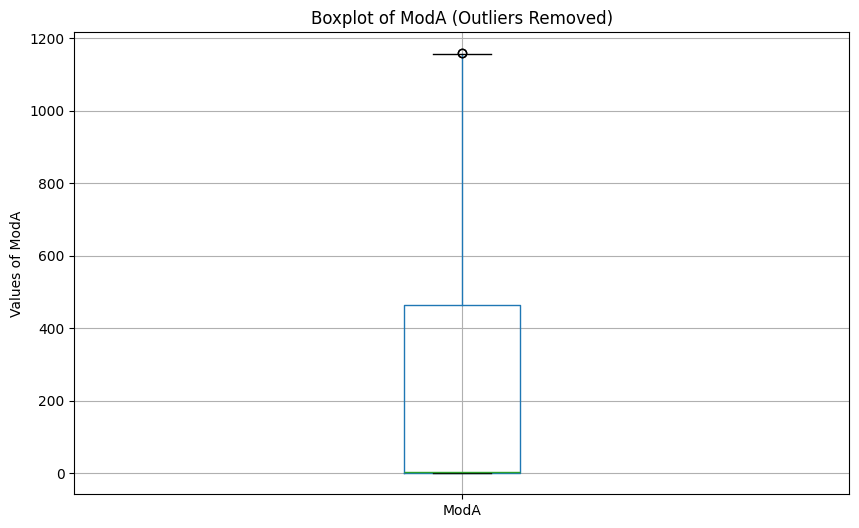

In [25]:
def displayWithoutOutliers(column):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size if needed
    df_no_outliers = removeOutliers(column)  # Remove outliers from the column
    df_no_outliers.boxplot(column=column, ax=ax)

# Customize the plot as desired
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.ylabel(f'Values of {column}')

    plt.show()

displayWithoutOutliers('ModA')

Detected outliers in column:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849    2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
522024 2022-08-06 12:25:00  1229.0  764.2  455.8  1138.0  1133.0  30.2  69.2   
522046 2022-08-06 12:47:00  1218.0  619.7  580.5  1130.0  1128.0  30.3  70.7   
522067 2022-08-06 13:08:00  1218.0  724.9  477.8  1137.0  1133.0  30.5  67.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         W

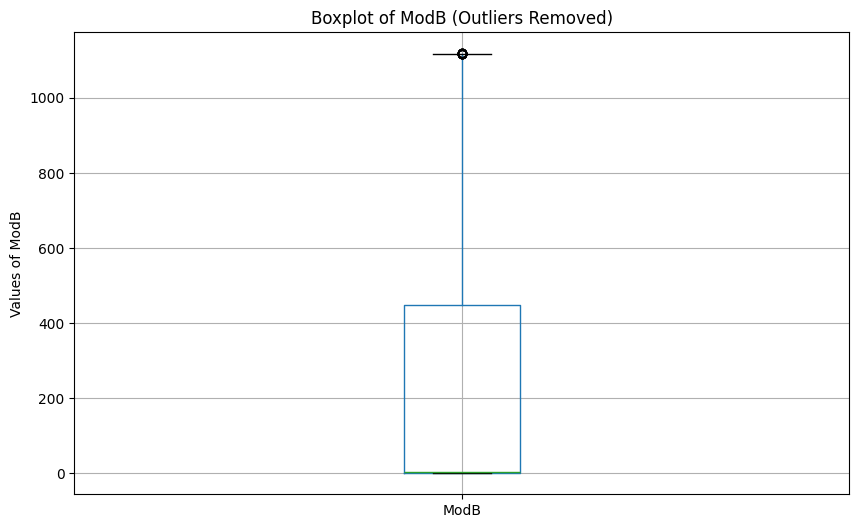

In [26]:

displayWithoutOutliers('ModB')

Detected outliers in column:
                 Timestamp    GHI  DNI    DHI   ModA   ModB  Tamb    RH   WS  \
2209   2021-08-10 12:50:00  360.2  0.7  359.9  339.9  344.2  31.6  63.0  6.4   
2879   2021-08-11 00:00:00   -2.0 -0.3   -1.7    0.0    0.0  24.7  93.7  6.9   
2950   2021-08-11 01:11:00   -1.2 -0.2   -0.6    0.0    0.0  23.9  96.2  6.6   
2957   2021-08-11 01:18:00   -1.2 -0.1   -0.6    0.0    0.0  23.5  95.6  6.4   
2958   2021-08-11 01:19:00   -1.2 -0.2   -0.6    0.0    0.0  23.5  94.9  7.9   
...                    ...    ...  ...    ...    ...    ...   ...   ...  ...   
525151 2022-08-08 16:32:00    4.7 -0.1    4.8    6.0    5.9  22.0  99.1  7.3   
525152 2022-08-08 16:33:00    4.8  0.1    4.9    6.0    5.9  22.0  99.1  6.3   
525155 2022-08-08 16:36:00    4.8  0.0    4.9    6.0    5.9  22.0  99.1  6.9   
525156 2022-08-08 16:37:00    4.9  0.0    5.0    6.0    5.9  22.0  99.1  6.5   
525159 2022-08-08 16:40:00    4.9 -0.1    5.0    5.9    5.7  22.1  99.2  6.3   

        WS

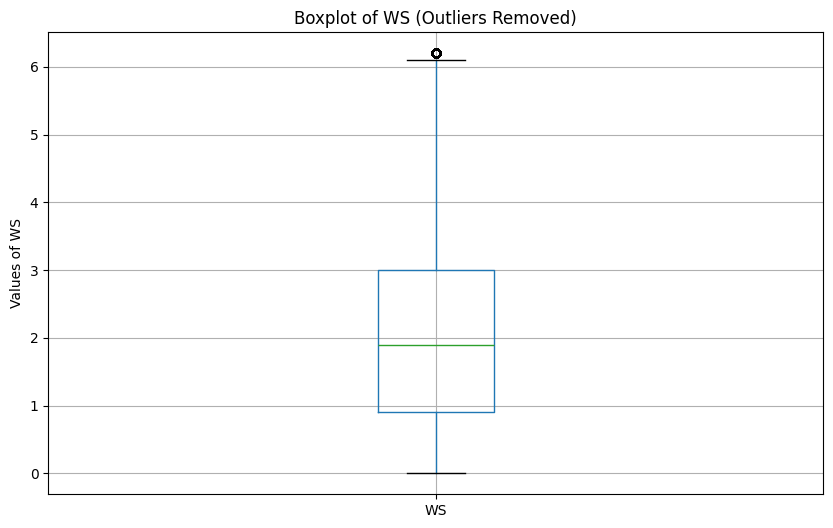

In [27]:
displayWithoutOutliers('WS')

Detected outliers in column:
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
2876   2021-08-10 23:57:00 -1.2 -0.5 -1.0   0.0   0.0  25.3  91.5  5.6   
2879   2021-08-11 00:00:00 -2.0 -0.3 -1.7   0.0   0.0  24.7  93.7  6.9   
2950   2021-08-11 01:11:00 -1.2 -0.2 -0.6   0.0   0.0  23.9  96.2  6.6   
2957   2021-08-11 01:18:00 -1.2 -0.1 -0.6   0.0   0.0  23.5  95.6  6.4   
2958   2021-08-11 01:19:00 -1.2 -0.2 -0.6   0.0   0.0  23.5  94.9  7.9   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525143 2022-08-08 16:24:00  4.5 -0.1  4.5   5.8   5.7  21.9  99.0  6.7   
525150 2022-08-08 16:31:00  4.7 -0.2  4.8   5.9   5.8  22.0  99.1  6.7   
525151 2022-08-08 16:32:00  4.7 -0.1  4.8   6.0   5.9  22.0  99.1  7.3   
525155 2022-08-08 16:36:00  4.8  0.0  4.9   6.0   5.9  22.0  99.1  6.9   
525159 2022-08-08 16:40:00  4.9 -0.1  5.0   5.9   5.7  22.1  99.2  6.3   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
28

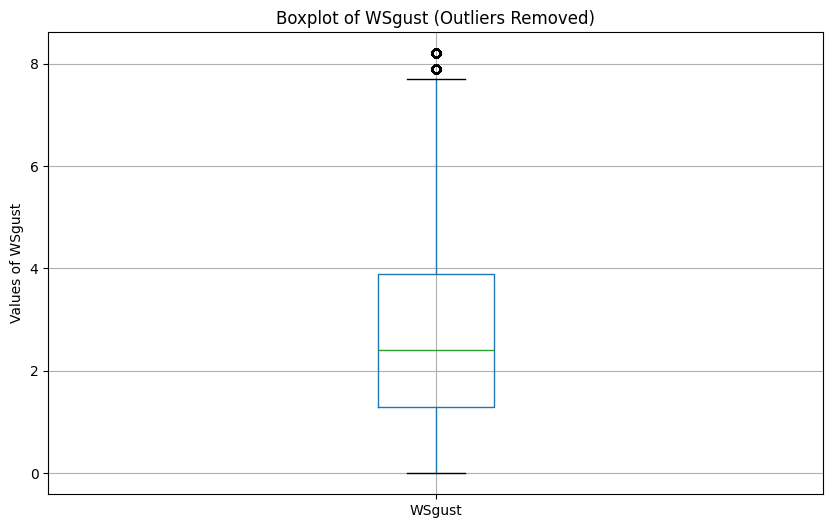

In [28]:
displayWithoutOutliers('WSgust')